In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
#read in study data
studydata_df = pd.read_csv('Resources/Study_results.csv')
studydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#read in mouse data
mousedata_df = pd.read_csv('Resources/Mouse_metadata.csv')
mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# #search for duplicates

duplicateDFRow = studydata_df[studydata_df.duplicated()]
print(duplicateDFRow)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137     g989          0                45.0                 0


In [5]:
#drop Mouse ID g989
restudydata_df=studydata_df[(studydata_df["Mouse ID"]!="g989")]
restudydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [17]:
remousedata_df=mousedata_df[(mousedata_df["Mouse ID"]!="g989")]
remousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
#drop duplicates
cleanstudydata_df= restudydata_df.reset_index().drop_duplicates(subset=['Mouse ID'], keep ='last').set_index('index')
cleanstudydata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,
1,f932,0,45.000000,0
20,x336,0,45.000000,0
53,h428,0,45.000000,0
55,v199,0,45.000000,0
109,o848,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1


In [18]:
#combining the data files
alldata_df = pd.merge(cleanstudydata_df, remousedata_df, on="Mouse ID")
alldata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [50]:
# mean_tumorsize = np.mean('Drug Regimen', 'Tumor Volume (mm3)')
# print(f"The mean is {mean_tumorsize}")

# median_tumorsize = np.median('Tumor Volume (mm3)', 'Drug Regimen')
# print(f"The median  is {mean_tumorsize}")
# var_tumorsize = np.var('Tumor Volume (mm3)', ddof = 0)
# print(f"The variance using the NumPy module is {var_numpy}")

# std_tumorsize = np.std('Tumor Volume (mm3)',ddof = 0)
# print(f"The standard deviation using the NumPy module is {sd_numpy}")



# Create a new variable that holds the sum of our groups
sum_it_up = tumor_drug_df.mean('Tumor Volume (mm3)')
sum_it_up.head()

ValueError: No axis named Tumor Volume (mm3) for object type <class 'pandas.core.frame.DataFrame'>

In [40]:
tumor_drug_df= alldata_df[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_drug_df

,Drug Regimen,Tumor Volume (mm3)
0,Ketapril,45.000000
1,Naftisol,45.000000
2,Ketapril,45.000000
3,Naftisol,45.000000
4,Stelasyn,45.000000
...,...,...
243,Capomulin,41.581521
244,Capomulin,31.023923
245,Ceftamin,61.433892
246,Placebo,58.634971


In [46]:
#Returns the mean of the values in col2, grouped by the values in col1
meandrugs_df= tumor_drug_df.groupby('Drug Regimen'), ['Tumor Volume (mm3)']
meandrugs_df
# drugs=tumor_drug_df["Drug Regimen"].unique()
# drugs

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001E99564BF08>,
 ['Tumor Volume (mm3)'])

In [42]:
drugs=tumor_drug_df["Drug Regimen"].unique()
drugs

array(['Ketapril', 'Naftisol', 'Stelasyn', 'Zoniferol', 'Placebo',
       'Ceftamin', 'Propriva', 'Infubinol', 'Ramicane', 'Capomulin'],
      dtype=object)

In [29]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` 
#and Matplotlib's `pyplot` that shows the number of total mice for each
#treatment regimen throughout the course of the study.
micecount_drug_df= alldata_df[["Drug Regimen", "Mouse ID"]]
micecount_drug_df

,Drug Regimen,Mouse ID
0,Ketapril,f932
1,Naftisol,x336
2,Ketapril,h428
3,Naftisol,v199
4,Stelasyn,o848
...,...,...
243,Capomulin,r944
244,Capomulin,u364
245,Ceftamin,p438
246,Placebo,x773


In [30]:
micecount = micecount_drug_df["Drug Regimen"].value_counts()
micecount

Capomulin    25
Placebo      25
Ketapril     25
Infubinol    25
Ceftamin     25
Zoniferol    25
Ramicane     25
Naftisol     25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

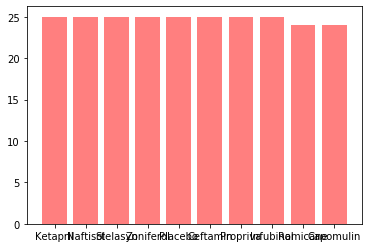

In [31]:
#matplot
# numbermice_treatment = alldata_df.plot(kind="bar", title="Total Mice for each treatment")
# numbermice_treatment.set_xlabel("Drug Treatment")
# numbermice_treatment.set_ylabel("Number of Mice")
plt.bar(drugs, micecount, color='r', alpha=0.5, align="center")
plt.set_xticklabels(df.index,rotation=90)